## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [5]:
# Преобразование pickup_datetime в формат datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [6]:
# как видно тепреь формат datetime,определеим временные рамки
# Определение временных рамок
start_date = taxi_data['pickup_datetime'].min().date()
end_date = taxi_data['pickup_datetime'].max().date()
# Вывод временных рамок
print(f"Данные представлены за период с {start_date} по {end_date}.")

Данные представлены за период с 2016-01-01 по 2016-06-30.


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [7]:
# Подсчет пропущенных значений по каждому столбцу
missing_values = taxi_data.isnull().sum()

# Суммарное количество пропущенных значений по всем столбцам
total_missing_values = missing_values.sum()

# Вывод результата
print(missing_values)
print(total_missing_values)


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [8]:
# a)
unique_vendors = taxi_data['vendor_id'].nunique()
print(f"Количество уникальных таксопарков: {unique_vendors}")

Количество уникальных таксопарков: 2


In [9]:
max_passengers = taxi_data['passenger_count'].max()
print(f"Максимальное количество пассажиров: {max_passengers}")

Максимальное количество пассажиров: 9


In [10]:
mean_trip_duration = round(taxi_data['trip_duration'].mean())
median_trip_duration = round(taxi_data['trip_duration'].median())

print(f"Средняя длительность поездки: {mean_trip_duration} секунд")
print(f"Медианная длительность поездки: {median_trip_duration} секунд")


Средняя длительность поездки: 959 секунд
Медианная длительность поездки: 662 секунд


In [11]:
min_trip_duration = taxi_data['trip_duration'].min()
max_trip_duration = taxi_data['trip_duration'].max()

print(f"Минимальное время поездки: {min_trip_duration} секунд")
print(f"Максимальное время поездки: {max_trip_duration} секунд")


Минимальное время поездки: 1 секунд
Максимальное время поездки: 3526282 секунд


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [12]:
def add_datetime_features(df):
    # Преобразование pickup_datetime в формат datetime
    # df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    
    # Добавление новых столбцов
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.weekday
    
    return df

# Применение функции к данным
taxi_data = add_datetime_features(taxi_data)
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5


In [13]:
# а) Сколько поездок было совершено в субботу?
# Чтобы найти количество поездок, совершенных в субботу, нужно отфильтровать данные по значению pickup_day_of_week == 5, 
# так как суббота соответствует этому порядковому номеру (где 0 — понедельник, 6 — воскресенье).
saturday_trips = taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0]
print(f"Количество поездок, совершенных в субботу: {saturday_trips}")

Количество поездок, совершенных в субботу: 220868


In [14]:
# б) Сколько поездок в среднем совершается в день?
# Для вычисления среднего количества поездок в день, сначала нужно посчитать количество поездок на каждую уникальную дату (pickup_date), 
# а затем найти среднее значение.

average_trips_per_day = taxi_data.groupby('pickup_date').size().mean()
print(f"Среднее количество поездок в день: {round(average_trips_per_day)}")

Среднее количество поездок в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [15]:
import holidays
# Создаем объект с праздниками для США
us_holidays = holidays.US(years=2016)
# Преобразуем даты праздников в DataFrame
holidays_df = pd.DataFrame(list(us_holidays.items()), columns=['holiday_date', 'holiday_name'])
# Сохраняем в CSV
holidays_df[['holiday_date']].to_csv('data/holiday_data.csv', index=False)
holidays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   holiday_date  11 non-null     object
 1   holiday_name  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [16]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
# Функция для добавления признака праздничных дней
def add_holiday_features(taxi_data, holiday_data):
    # Преобразование столбцов в формат datetime
    taxi_data['pickup_date'] = pd.to_datetime(taxi_data['pickup_datetime']).dt.date
    holiday_data['holiday_date'] = pd.to_datetime(holiday_data['holiday_date']).dt.date
    
    # Добавление признака праздничного дня
    taxi_data['pickup_holiday'] = taxi_data['pickup_date'].isin(holiday_data['holiday_date']).astype(int)
    
    return taxi_data

# Применение функции к данным
taxi_data = add_holiday_features(taxi_data, holiday_data)

# Фильтрация поездок, совершенных в праздничные дни
holiday_trips = taxi_data[taxi_data['pickup_holiday'] == 1]

# Проверка наличия NaN в столбце trip_duration
print(f"Пропущенные значения в trip_duration до удаления: {holiday_trips['trip_duration'].isnull().sum()}")

# Удаление всех NaN значений из столбца trip_duration
holiday_trips = holiday_trips.dropna(subset=['trip_duration'])

# Повторная проверка наличия NaN
print(f"Пропущенные значения в trip_duration после удаления: {holiday_trips['trip_duration'].isnull().sum()}")

# Вычисление медианной длительности поездок в праздничные дни
if not holiday_trips['trip_duration'].isnull().any():
    median_trip_duration_holidays = round(holiday_trips['trip_duration'].median())
    print(f"Медианная длительность поездки в праздничные дни: {median_trip_duration_holidays} секунд")
else:
    print("В данных всё ещё присутствуют NaN значения в столбце 'trip_duration'")

Пропущенные значения в trip_duration до удаления: 0
Пропущенные значения в trip_duration после удаления: 0
Медианная длительность поездки в праздничные дни: 556 секунд


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [17]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
# ваш код здесь

In [18]:
# Функция для добавления признаков из OSRM данных
def add_osrm_features(taxi_data, osrm_data):
    # Выбираем нужные столбцы из таблицы osrm_data
    osrm_data = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']]
    
    # Объединение таблиц по столбцу id
    merged_data = taxi_data.merge(osrm_data, on='id', how='left')
    
    return merged_data

# Загрузка данных о поездках и данных OSRM
# taxi_data = pd.read_csv('data/train.csv')
# osrm_data = pd.read_csv('data/osrm_data.csv')

# Применение функции к данным
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.head()
# # 1. Вычисление разницы между медианными длительностями поездок
# median_trip_duration = taxi_data['trip_duration'].median()
# median_osrm_travel_time = taxi_data['total_travel_time'].median()

# difference_in_median = round(median_trip_duration - median_osrm_travel_time)
# print(f"Разница между медианной длительностью поездки и медианной длительностью поездки из OSRM: {difference_in_median} секунд")

# # 2. Подсчет количества строк с пропусками в столбцах с информацией из OSRM API
# missing_rows = taxi_data[['total_distance', 'total_travel_time', 'number_of_steps']].isnull().any(axis=1).sum()
# print(f"Количество строк с пропусками в столбцах с информацией из OSRM API: {missing_rows}")

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,0,0,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,6,0,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,1,0,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,2,0,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,5,0,1614.9,140.1,5.0


In [19]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int32         
 13  pickup_day_o

In [20]:
# Функция для расчета расстояния Хаверсина

def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

# Функция для расчета направления движения
def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [21]:
# Функция для добавления географических признаков в таблицу
def add_geographical_features(taxi_data):
    taxi_data['haversine_distance'] = get_haversine_distance(
        taxi_data['pickup_latitude'], 
        taxi_data['pickup_longitude'], 
        taxi_data['dropoff_latitude'], 
        taxi_data['dropoff_longitude']
    )
    
    taxi_data['direction'] = get_angle_direction(
        taxi_data['pickup_latitude'], 
        taxi_data['pickup_longitude'], 
        taxi_data['dropoff_latitude'], 
        taxi_data['dropoff_longitude']
    )
    
    return taxi_data

# Применение функции к данным
taxi_data = add_geographical_features(taxi_data)

# Вычисление медианного расстояния Хаверсина
median_haversine_distance = round(taxi_data['haversine_distance'].median(), 2)
print(f"Медианное расстояние Хаверсина поездок: {median_haversine_distance} километров")

Медианное расстояние Хаверсина поездок: 2.09 километров


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [22]:
# # создаем обучающую выборку из географических координат всех точек
# def add_cluster_features(taxi_data, kmeans):
#     coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
#                         taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
#     # обучаем алгоритм кластеризации
#     kmeans = cluster.KMeans(n_clusters=10, random_state=42)
#     kmeans.fit(coords)

# # ваш код здесь
# Функция для добавления признака кластера
def add_cluster_features(taxi_data, kmeans):
    # Создаем обучающую выборку из географических координат всех точек
    coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                        taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
    
    # Прогнозируем кластеры для каждой поездки
    taxi_data['geo_cluster'] = kmeans.predict(coords)
    
    return taxi_data

# Загрузка данных о поездках
# taxi_data = pd.read_csv('data/train.csv')

# Создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# Применение функции к данным
taxi_data = add_cluster_features(taxi_data, kmeans)

# Подсчет количества поездок в каждом кластере
cluster_counts = taxi_data['geo_cluster'].value_counts()

# Поиск минимального кластера
min_cluster_size = cluster_counts.min()

print(f"Количество поездок в наименьшем географическом кластере: {min_cluster_size}")

Количество поездок в наименьшем географическом кластере: 2


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [23]:
weather_data = pd.read_csv('data/weather_data.csv')

# ваш код здесь

In [24]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,geo_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,17,0,0,2009.1,164.9,5.0,1.498521,99.970196,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,0,6,0,2513.2,332.0,6.0,1.805507,-117.153768,9
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,11,1,0,11060.8,767.6,16.0,6.385098,-159.680165,9
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,19,2,0,1779.4,235.8,4.0,1.485498,-172.737700,9
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,13,5,0,1614.9,140.1,5.0,1.188588,179.473585,6


In [25]:
def add_weather_features(taxi_data, weather_data):
    # Преобразуем столбцы времени к формату datetime для объединения
    taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
    weather_data['time'] = pd.to_datetime(weather_data['time'])
    
    # Округляем время поездки до часа для объединения с погодными данными
    taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.floor('H')
    
    # Объединяем данные о поездках и погоде
    taxi_data = pd.merge(taxi_data, weather_data, left_on='pickup_hour', right_on='time', how='left')
    
    # Убираем лишний столбец времени после объединения
    taxi_data.drop(columns=['pickup_hour', 'time'], inplace=True)
    
    return taxi_data

# Применение функции к данным
# Предположим, что weather_data уже загружена ранее
taxi_data = add_weather_features(taxi_data, weather_data)

# Проверка наличия новых столбцов
print(taxi_data.head())


C:\Users\Илья Берлов\AppData\Local\Temp\ipykernel_20676\1542747758.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.floor('H')


          id  vendor_id     pickup_datetime     dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  ...  dew Point visibility  wind dir  \
0         40.765602                  N  ...        2.2 

In [26]:
# Предполагается, что taxi_data уже содержит данные о погоде после выполнения функции add_weather_features()

# а) Сколько поездок было совершено в снежную погоду?
snowy_trips = taxi_data[taxi_data['events'] == 'Snow'].shape[0]
print(f"Количество поездок, совершенных в снежную погоду: {snowy_trips}")

# б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями?
weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']

# Определение строк, где хотя бы один из погодных столбцов содержит пропуск
rows_with_missing = taxi_data[weather_columns].isnull().any(axis=1).sum()

# Подсчет процента строк с пропусками от общего числа строк
percentage_missing = (rows_with_missing / taxi_data.shape[0]) * 100
print(f"Процент пропусков в строках с погодными условиями: {percentage_missing:.2f}%")


Количество поездок, совершенных в снежную погоду: 13126
Процент пропусков в строках с погодными условиями: 95.10%


In [27]:
print(taxi_data['events'].value_counts(dropna=False))


events
NaN     1387217
Rain      58300
Snow      13126
Fog           1
Name: count, dtype: int64


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [28]:
def fill_null_weather_data(taxi_data):
    # Заполнение пропусков в погодных данных медианными значениями по дате
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
    taxi_data['pickup_date'] = taxi_data['pickup_datetime'].dt.date  # Извлечение даты
    
    for col in weather_columns:
        taxi_data[col] = taxi_data[col].fillna(
            taxi_data.groupby('pickup_date')[col].transform('median')
        )
    
    # Заполнение пропусков в столбце events строкой 'None'
    taxi_data['events'] = taxi_data['events'].fillna('None')
    
    # Заполнение пропусков в данных из OSRM медианными значениями по столбцам
    osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
    for col in osrm_columns:
        taxi_data[col] = taxi_data[col].fillna(taxi_data[col].median())
    
    return taxi_data

# Применение функции к данным
taxi_data = fill_null_weather_data(taxi_data)

# Вычисление медианы в столбце temperature после заполнения пропусков
median_temperature = round(taxi_data['temperature'].median(), 1)
print(f"Медиана в столбце temperature после заполнения пропусков: {median_temperature}")

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


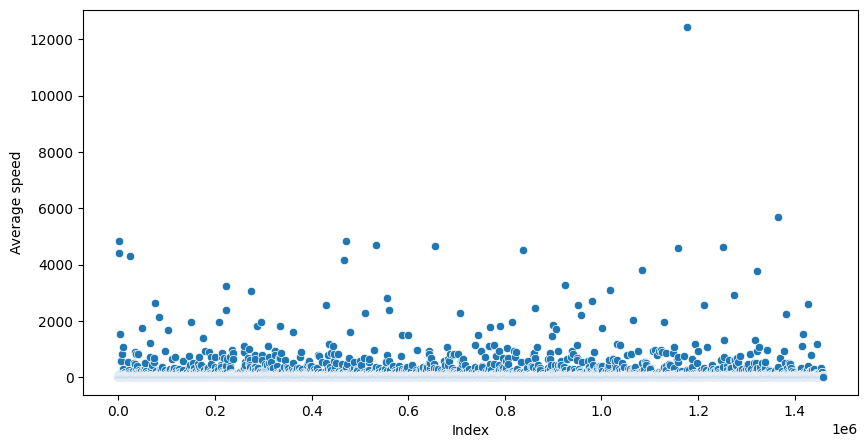

In [29]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [30]:
# Количество выбросов по длительности поездки (более 24 часов)
duration_outliers = taxi_data[taxi_data['trip_duration'] > 86400]
print(f"Количество выбросов по длительности поездки: {duration_outliers.shape[0]}")

# Удаление выбросов по длительности
taxi_data = taxi_data[taxi_data['trip_duration'] <= 86400]


Количество выбросов по длительности поездки: 4


In [31]:
# Вычисление средней скорости в км/ч
avg_speed = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6

# Количество выбросов по скорости (более 300 км/ч)
speed_outliers = taxi_data[avg_speed > 300]
print(f"Количество выбросов по скорости: {speed_outliers.shape[0]}")

# Удаление выбросов по скорости
taxi_data = taxi_data[avg_speed <= 300]


Количество выбросов по скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [32]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

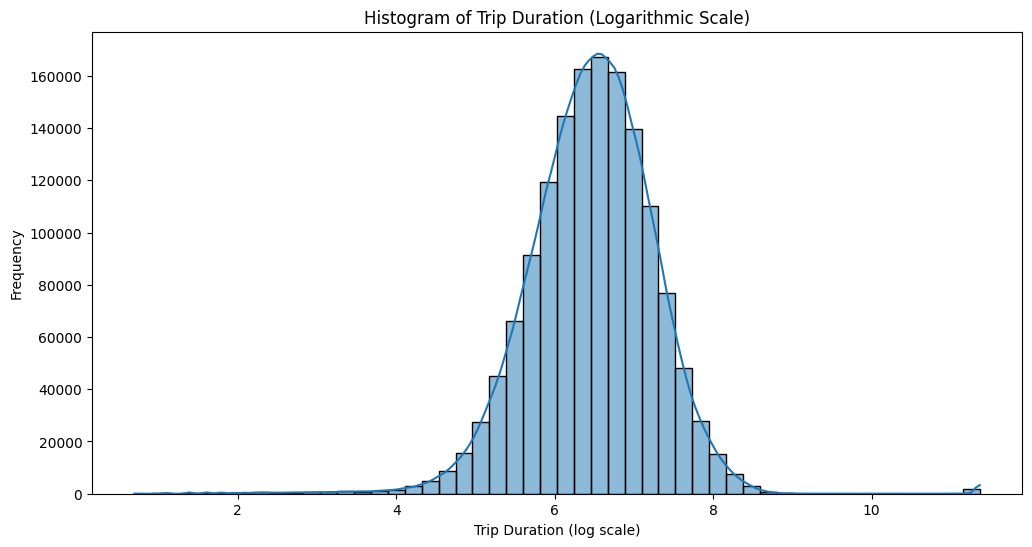

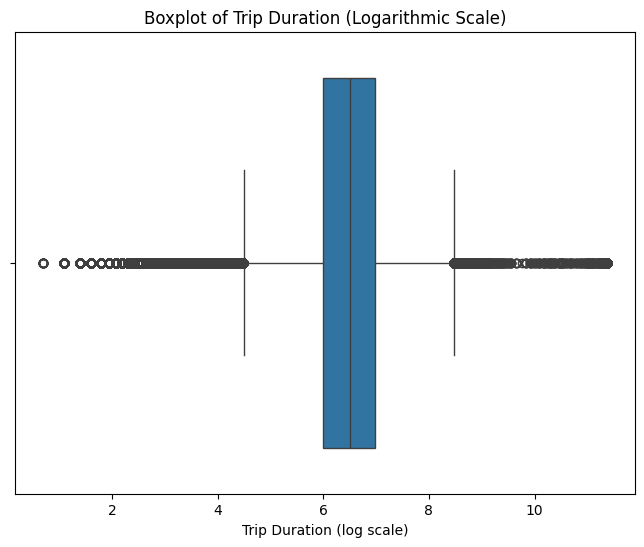

In [33]:
# Построение гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(taxi_data['trip_duration_log'], bins=50, kde=True)
plt.title('Histogram of Trip Duration (Logarithmic Scale)')
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Frequency')
plt.show()

# Построение коробчатой диаграммы
plt.figure(figsize=(8, 6))
sns.boxplot(x=taxi_data['trip_duration_log'])
plt.title('Boxplot of Trip Duration (Logarithmic Scale)')
plt.xlabel('Trip Duration (log scale)')
plt.show()

In [34]:
# Проведение теста Д'Агостино
stat, p_value = stats.normaltest(taxi_data['trip_duration_log'])

# Вывод результатов
print(f"p-value: {p_value:.2f}")

# Проверка гипотезы при уровне значимости alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Распределение не является нормальным (отклоняем H0)")
else:
    print("Распределение является нормальным (не отклоняем H0)")

p-value: 0.00
Распределение не является нормальным (отклоняем H0)


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

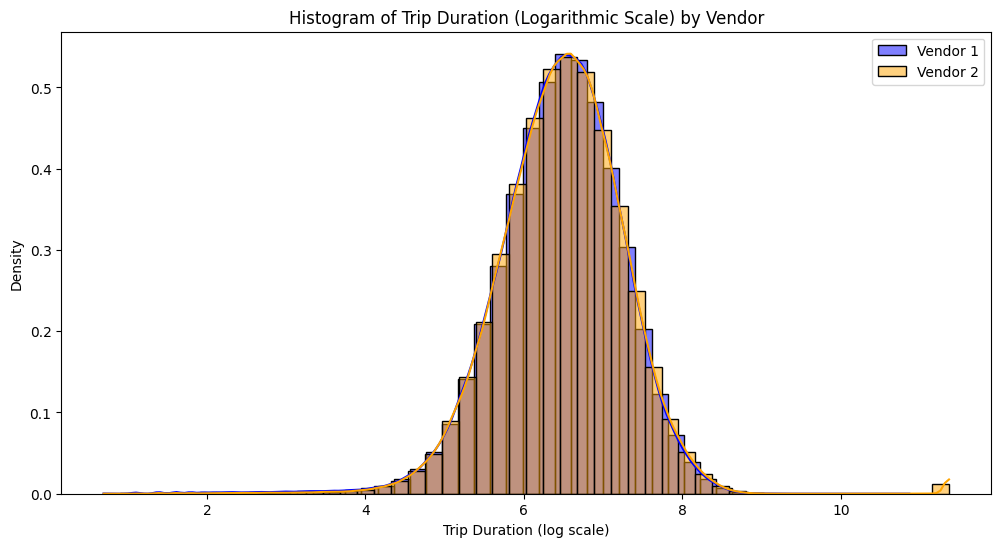

In [35]:
plt.figure(figsize=(12, 6))

# Построение гистограмм с наложением
sns.histplot(taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log'], 
             color='blue', label='Vendor 1', kde=True, stat="density", bins=50)
sns.histplot(taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log'], 
             color='orange', label='Vendor 2', kde=True, stat="density", bins=50)

plt.title('Histogram of Trip Duration (Logarithmic Scale) by Vendor')
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Density')
plt.legend()
plt.show()



### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

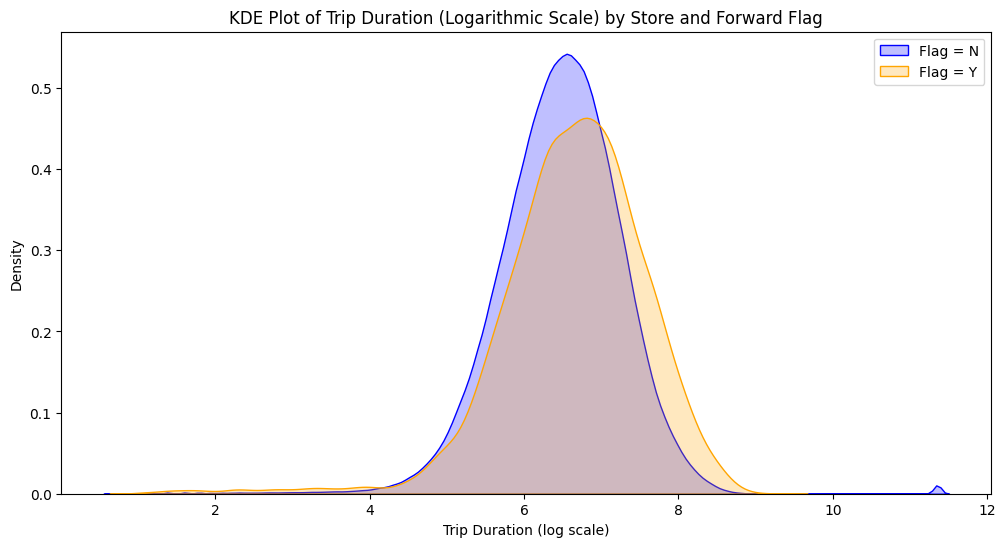

In [36]:
plt.figure(figsize=(12, 6))

# Построение графиков плотности с наложением
sns.kdeplot(taxi_data[taxi_data['store_and_fwd_flag'] == 'N']['trip_duration_log'], 
            color='blue', label='Flag = N', fill=True)
sns.kdeplot(taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']['trip_duration_log'], 
            color='orange', label='Flag = Y', fill=True)

plt.title('KDE Plot of Trip Duration (Logarithmic Scale) by Store and Forward Flag')
plt.xlabel('Trip Duration (log scale)')
plt.ylabel('Density')
plt.legend()
plt.show()


### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

In [37]:
# Извлечение часа дня из временного признака pickup_datetime
taxi_data['pickup_hour'] = taxi_data['pickup_datetime'].dt.hour


C:\Users\Илья Берлов\AppData\Local\Temp\ipykernel_20676\466432986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_hour', data=taxi_data, palette='viridis')


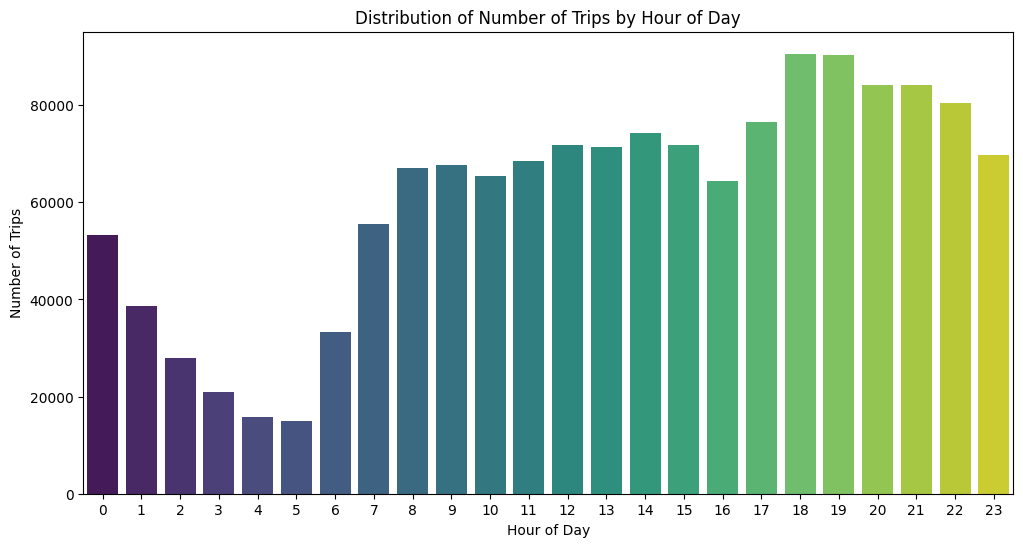

In [38]:

plt.figure(figsize=(12, 6))

# Построение распределения количества поездок по часам
sns.countplot(x='pickup_hour', data=taxi_data, palette='viridis')
plt.title('Distribution of Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

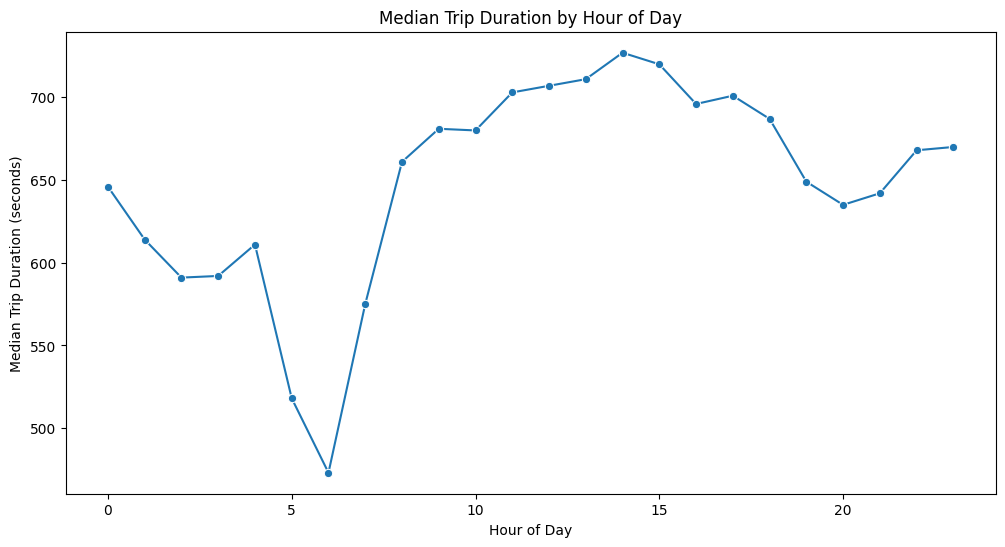

In [39]:
plt.figure(figsize=(12, 6))

# Группировка данных по часам и расчет медианы длительности поездки
median_trip_duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()

# Построение графика зависимости медианной длительности поездки от часа дня
sns.lineplot(x=median_trip_duration_by_hour.index, y=median_trip_duration_by_hour.values, marker='o')
plt.title('Median Trip Duration by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Median Trip Duration (seconds)')
plt.show()


### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


In [40]:
# Извлечение дня недели из временного признака pickup_datetime
# В pandas день недели начинается с 0 (понедельник) и заканчивается 6 (воскресенье)
taxi_data['pickup_day_of_week'] = taxi_data['pickup_datetime'].dt.dayofweek


C:\Users\Илья Берлов\AppData\Local\Temp\ipykernel_20676\1714746703.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pickup_day_of_week', data=taxi_data, palette='viridis')


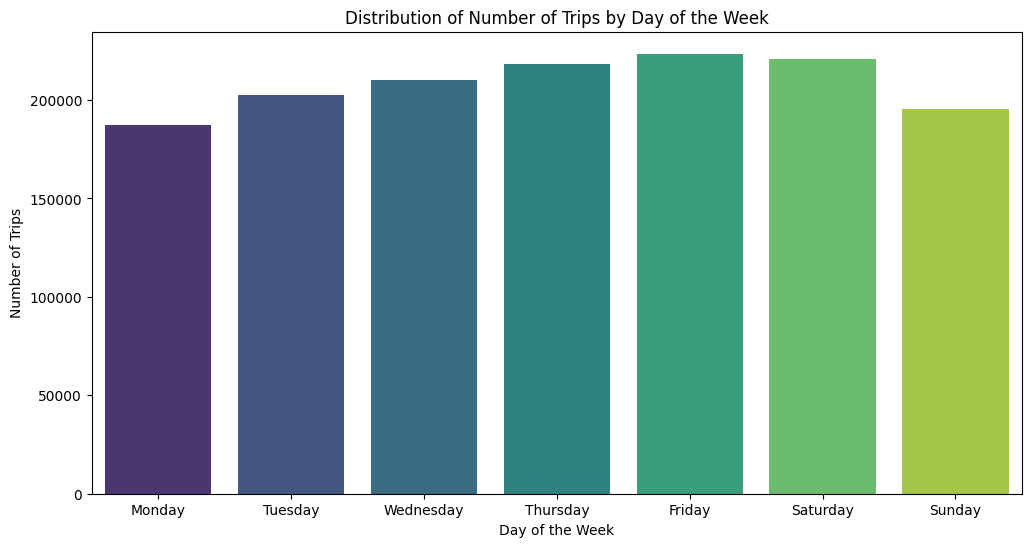

In [41]:
plt.figure(figsize=(12, 6))

# Построение распределения количества поездок по дням недели
sns.countplot(x='pickup_day_of_week', data=taxi_data, palette='viridis')
plt.title('Distribution of Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

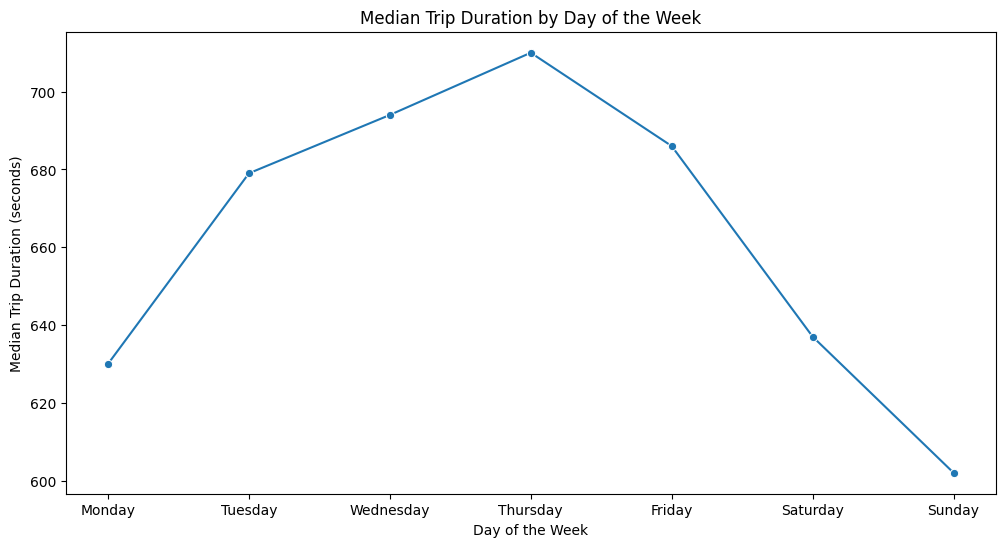

In [42]:
plt.figure(figsize=(12, 6))

# Группировка данных по дням недели и расчет медианы длительности поездки
median_trip_duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

# Построение графика зависимости медианной длительности поездки от дня недели
sns.lineplot(x=median_trip_duration_by_day.index, y=median_trip_duration_by_day.values, marker='o')
plt.title('Median Trip Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Median Trip Duration (seconds)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

In [43]:
# Создание сводной таблицы
pivot_table = taxi_data.pivot_table(
    values='trip_duration',
    index='pickup_hour',
    columns='pickup_day_of_week',
    aggfunc='median'
)

# Просмотр сводной таблицы
print(pivot_table)

pickup_day_of_week      0      1      2      3      4      5      6
pickup_hour                                                        
0                   598.0  591.0  601.0  609.0  649.0  685.0  675.0
1                   567.0  584.0  553.0  564.0  600.0  640.0  643.0
2                   565.0  565.0  544.0  576.0  572.0  610.0  604.5
3                   600.0  568.0  574.0  584.0  578.0  591.0  608.0
4                   640.0  600.5  616.0  595.0  634.0  610.0  598.5
5                   519.0  455.0  448.0  480.0  532.0  631.0  634.0
6                   462.0  461.0  463.0  471.0  476.0  508.0  554.0
7                   575.0  586.0  593.0  599.0  578.0  481.0  474.0
8                   672.0  703.0  704.0  721.0  689.0  489.0  460.0
9                   705.0  755.0  742.0  772.0  743.0  510.0  470.0
10                  694.0  778.0  788.0  772.0  744.0  542.0  506.0
11                  702.0  806.0  809.0  804.0  754.5  579.0  551.0
12                  692.0  783.5  800.5  799.0  

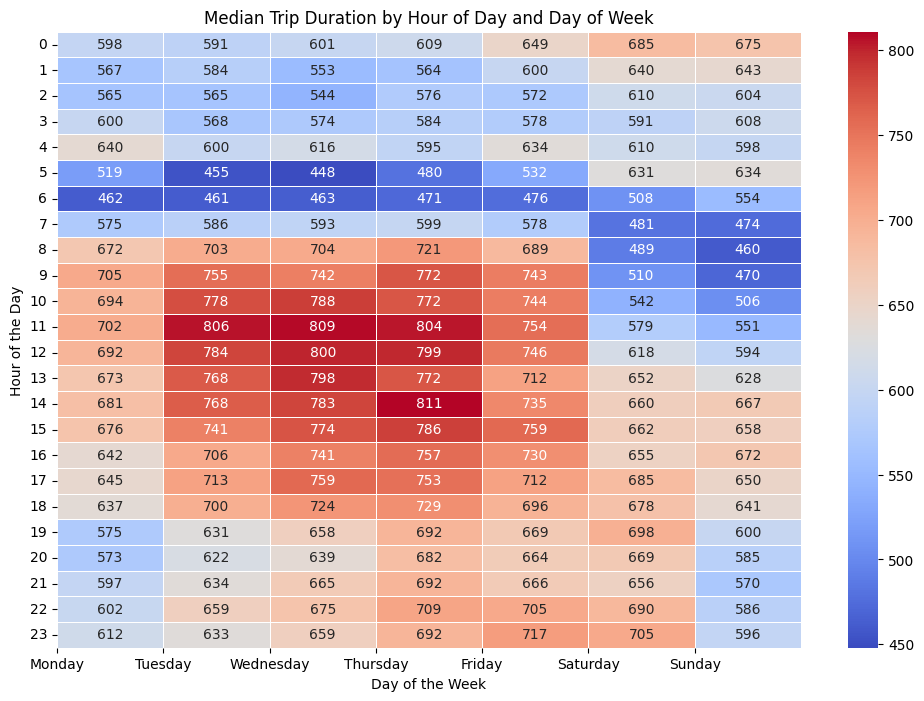

In [44]:

plt.figure(figsize=(12, 8))

# Визуализация тепловой карты
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.0f', linewidths=.5)

# Настройка меток осей
plt.title('Median Trip Duration by Hour of Day and Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.yticks(rotation=0)  # Часы по оси y будут горизонтальными

plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


c:\Users\Илья Берлов\Desktop\skillfactory\проектный практикум\Project_Practicum_2_URFU\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


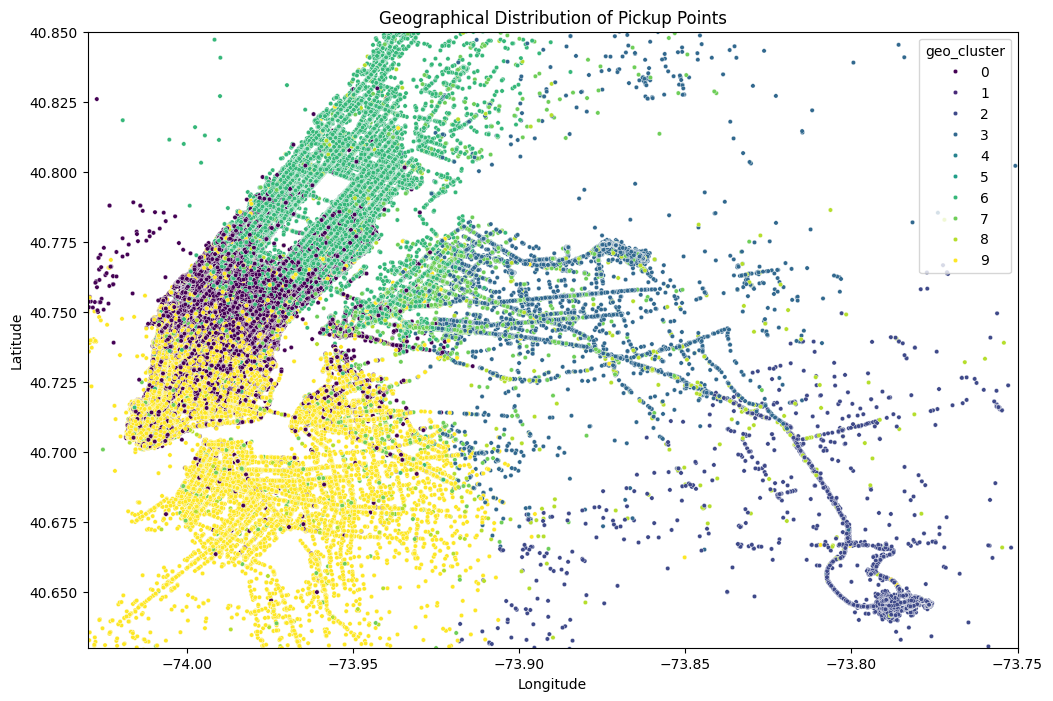

In [45]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.figure(figsize=(12, 8))

# Диаграмма рассеяния для точек начала поездок
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='geo_cluster', 
                data=taxi_data, palette='viridis', legend='full', s=10)

# Устанавливаем границы для осей
plt.xlim(city_long_border)
plt.ylim(city_lat_border)

plt.title('Geographical Distribution of Pickup Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
# ваш код здесь

c:\Users\Илья Берлов\Desktop\skillfactory\проектный практикум\Project_Practicum_2_URFU\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


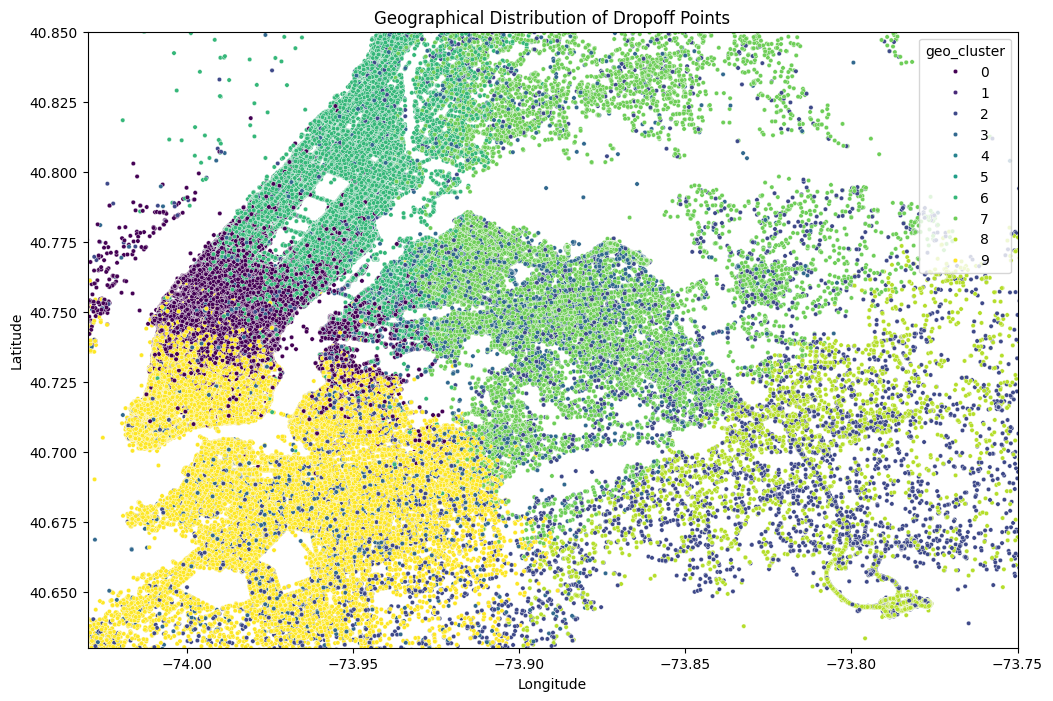

In [46]:
plt.figure(figsize=(12, 8))

# Диаграмма рассеяния для точек завершения поездок
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='geo_cluster', 
                data=taxi_data, palette='viridis', legend='full', s=10)

# Устанавливаем границы для осей
plt.xlim(city_long_border)
plt.ylim(city_lat_border)

plt.title('Geographical Distribution of Dropoff Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [49]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 37)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_day_of_week', 'pickup_holiday',
       'total_distance', 'total_travel_time', 'number_of_steps',
       'haversine_distance', 'direction', 'geo_cluster', 'temperature',
       'windchill', 'heat index', 'humidity', 'pressure', 'dew Point',
       'visibility', 'wind dir', 'wind speed', 'gust speed', 'precip',
       'events', 'conditions', 'date', 'hour', 'trip_duration_log',
       'pickup_hour'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [50]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,wind dir,wind speed,gust speed,precip,events,conditions,date,hour,trip_duration_log,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,ENE,27.8,57.4,0.3,None,Overcast,2016-03-14,17.0,6.122493,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,West,7.4,0.0,0.0,None,Unknown,2016-06-12,0.0,6.498282,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,West,24.1,46.3,0.0,None,Clear,2016-01-19,11.0,7.661527,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,South,25.9,35.2,0.0,None,Clear,2016-04-06,19.0,6.063785,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,Variable,9.3,0.0,0.0,None,Clear,2016-03-26,13.0,6.077642,13


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?
Признак, который уникален для каждой поездки и не несет полезной информации для предсказания длительности поездки, — это id. Этот столбец является уникальным идентификатором каждой поездки и не имеет отношения к тому, сколько времени займёт поездка.

б) Утечка данных (data leak) - это…
Утечка данных (data leakage) — это ситуация, когда в модель попадает информация, которая не должна быть доступна на этапе обучения, но которая помогает модели предсказывать результаты. Это может привести к тому, что модель будет показывать слишком хорошие результаты на тестовых данных, но плохо работать на реальных данных, где такой информации не будет.

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?
Признак dropoff_datetime создает утечку данных. Этот признак содержит информацию о времени завершения поездки, что напрямую связано с целевым признаком trip_duration (длительность поездки). Если оставить этот признак в данных, модель будет иметь доступ к информации, которая определяет значение целевого признака, что приведет к некорректной работе модели.

In [51]:
# Удаление признаков id и dropoff_datetime
train_data = taxi_data.drop(columns=['id', 'dropoff_datetime'])

# Вывод формы данных и списка столбцов после удаления
print('Shape of data: {}'.format(train_data.shape))
print('Columns: {}'.format(train_data.columns))


Shape of data: (1458233, 35)
Columns: Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_date',
       'pickup_day_of_week', 'pickup_holiday', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine_distance',
       'direction', 'geo_cluster', 'temperature', 'windchill', 'heat index',
       'humidity', 'pressure', 'dew Point', 'visibility', 'wind dir',
       'wind speed', 'gust speed', 'precip', 'events', 'conditions', 'date',
       'hour', 'trip_duration_log', 'pickup_hour'],
      dtype='object')


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [52]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 33)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [53]:
# Кодирование признака vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)

# Кодирование признака store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# Рассчёт среднего по закодированному столбцу vendor_id
mean_vendor_id = train_data['vendor_id'].mean()
print(f"Среднее по закодированному столбцу vendor_id: {mean_vendor_id:.2f}")

# Рассчёт среднего по закодированному столбцу store_and_fwd_flag
mean_store_and_fwd_flag = train_data['store_and_fwd_flag'].mean()
print(f"Среднее по закодированному столбцу store_and_fwd_flag: {mean_store_and_fwd_flag:.3f}")


Среднее по закодированному столбцу vendor_id: 0.53
Среднее по закодированному столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [54]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
# Выбираем признаки для кодирования
features_to_encode = ['pickup_day_of_week', 'geo_cluster', 'events']

# Создаем экземпляр OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Применяем OneHotEncoder к выбранным признакам
encoded_features = one_hot_encoder.fit_transform(train_data[features_to_encode])

# Получаем закодированные имена столбцов
encoded_feature_names = one_hot_encoder.get_feature_names_out(features_to_encode)


In [55]:
# Преобразуем закодированный массив в DataFrame
data_onehot = pd.DataFrame(encoded_features.toarray(), columns=encoded_feature_names)

# Выводим информацию о сгенерированных столбцах
print(f"Количество бинарных столбцов после кодирования: {data_onehot.shape[1]}")


Количество бинарных столбцов после кодирования: 18


Добавим полученную таблицу с закодированными признаками:

In [56]:
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 48)


In [62]:
# Определение категориальных столбцов
categorical_columns = ['wind dir', 'conditions']

# Создание экземпляра OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')

# Применение OneHotEncoder к категориальным признакам
encoded_features = one_hot_encoder.fit_transform(train_data[categorical_columns])

# Преобразование в DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_columns))

# Объединение с основными данными
train_data = pd.concat([train_data.drop(columns=categorical_columns), encoded_df], axis=1)

# Проверка итоговой формы данных
print('Shape of data after encoding: {}'.format(train_data.shape))


Shape of data after encoding: (1458233, 79)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [63]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

In [75]:
# Удаление столбца date
train_data = train_data.drop(columns=['date'])


KeyError: "['date'] not found in axis"

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [76]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458233 entries, 0 to 1458232
Data columns (total 78 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   vendor_id                       1458233 non-null  int64  
 1   passenger_count                 1458233 non-null  int64  
 2   pickup_longitude                1458233 non-null  float64
 3   pickup_latitude                 1458233 non-null  float64
 4   dropoff_longitude               1458233 non-null  float64
 5   dropoff_latitude                1458233 non-null  float64
 6   store_and_fwd_flag              1458233 non-null  int64  
 7   trip_duration                   1458233 non-null  int64  
 8   pickup_holiday                  1458233 non-null  int64  
 9   total_distance                  1458233 non-null  float64
 10  total_travel_time               1458233 non-null  float64
 11  number_of_steps                 1458233 non-null  float64
 12  

In [80]:
# Заполнение пропущенных значений медианой по столбцам
train_data = train_data.fillna(train_data.median())


In [81]:
from IPython.display import display

# Пример использования display для отображения DataFrame
display(train_data.head())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind speed,gust speed,precip,hour,trip_duration_log,pickup_hour,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow,wind dir_ENE,wind dir_ESE,wind dir_East,wind dir_NE,wind dir_NNE,wind dir_NNW,wind dir_NW,wind dir_North,wind dir_SE,wind dir_SSE,wind dir_SSW,wind dir_SW,wind dir_South,wind dir_Variable,wind dir_WNW,wind dir_WSW,wind dir_West,wind dir_nan,conditions_Haze,conditions_Heavy Rain,conditions_Heavy Snow,conditions_Light Freezing Fog,conditions_Light Freezing Rain,conditions_Light Rain,conditions_Light Snow,conditions_Mostly Cloudy,conditions_Overcast,conditions_Partly Cloudy,conditions_Rain,conditions_Scattered Clouds,conditions_Snow,conditions_Unknown,conditions_nan
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,0,2009.1,164.9,5.0,1.498521,99.970196,4.4,-0.5,27.8,0.86,1017.5,2.2,8.0,27.8,57.4,0.3,17.0,6.122493,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,0,2513.2,332.0,6.0,1.805507,-117.153768,28.9,-0.5,29.9,0.53,1006.6,18.3,16.1,7.4,0.0,0.0,0.0,6.498282,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,0,11060.8,767.6,16.0,6.385098,-159.680165,-6.7,-14.3,27.8,0.46,1016.3,-16.7,16.1,24.1,46.3,0.0,11.0,7.661527,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,0,1779.4,235.8,4.0,1.485498,-172.737700,7.2,3.3,27.8,0.39,1019.1,-6.1,16.1,25.9,35.2,0.0,19.0,6.063785,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,0,1614.9,140.1,5.0,1.188588,179.473585,9.4,-0.5,27.8,0.46,1026.9,-1.7,16.1,9.3,0.0,0.0,13.0,6.077642,13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Разделение данных на признаки (X) и целевую переменную (y)
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y_log = train_data['trip_duration_log']

# Разделение на обучающую и валидационную выборки
X_train, X_valid, y_train_log, y_valid_log = train_test_split(
    X, y_log, test_size=0.33, random_state=42)

# Заполнение пропущенных значений в обучающей выборке
X_train = X_train.fillna(X_train.median())

# Применение SelectKBest для отбора 25 лучших признаков
selector = SelectKBest(score_func=f_regression, k=25)
X_train_selected = selector.fit_transform(X_train, y_train_log)

# Получение списка отобранных признаков
mask = selector.get_support()
selected_features = X_train.columns[mask]

# Вывод списка отобранных признаков
print("Отобранные признаки:", selected_features.tolist())



Отобранные признаки: ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_holiday', 'total_distance', 'total_travel_time', 'number_of_steps', 'haversine_distance', 'temperature', 'humidity', 'dew Point', 'hour', 'pickup_hour', 'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_2', 'geo_cluster_3', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [83]:
from sklearn.preprocessing import MinMaxScaler


In [84]:
scaler = MinMaxScaler()


In [85]:
# Обучение нормализатора на обучающей выборке и трансформация
X_train_scaled = scaler.fit_transform(X_train_selected)

# Трансформация валидационной выборки
X_valid_scaled = scaler.transform(X_valid[selected_features])


c:\Users\Илья Берлов\Desktop\skillfactory\проектный практикум\Project_Practicum_2_URFU\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [86]:
# Расчет среднего арифметического для первого предиктора (первого столбца) из валидационной выборки
mean_first_pred = X_valid_scaled[:, 0].mean()

# Вывод результата
print(f"Среднее арифметическое для первого предиктора из валидационной выборки: {mean_first_pred:.2f}")


Среднее арифметическое для первого предиктора из валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [ ]:
# ваш код здесь

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [ ]:
# ваш код здесь

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
# ваш код здесь

Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)